## 3.2

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### Implement clgs, mgs, qrhouse, and formQ

In [40]:
def clgs(A):
    (m, n)= A.shape
    V= A
    Q= np.eye(m, n)
    R= np.zeros((n,n))
    for j in range(n):
        for i in range(j-1):
            R[i, j]= np.dot(np.transpose(Q[:, i]), A[:,j])
            V[:, j]= V[:, j] - (R[i,j] * Q[:,i])
        R[j, j]= np.linalg.norm(V[:, j])
        Q[:, j]= V[:, j]/R[j,j]
    return Q, R

In [41]:
def mgs(A):
    (m, n)= A.shape
    Q= A
    R= np.zeros((n,n))
    for i in range(1, n-1):
        R[i, i]= np.linalg.norm(Q[:, i])
        Q[:, i]= Q[:, i] / R[i, i]
        R[i, i+1:n]= np.dot(Q[:, i], Q[:, i+1:n])
        Q[:, i+1:n]= Q[:, i+1:n]- np.outer(Q[:, i],R[i, i+1:n])
    R[n-1, n-1]= np.linalg.norm(Q[:, n-1])
    Q[:, n-1]= Q[:, n-1] / R[n-1, n-1]
    
    return Q, R

In [42]:
def qrhouse(A):
    (m, n)= A.shape
    R= A
    V= np.zeros((m, n))
    for k in range(min(m-1, n)):
        x= R[k:m, k]
        v= x+ np.transpose(np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1))
        V[k:m, k]= v
        R[k:m, k:n]= R[k:m, k:n] - np.outer((2*v),(np.dot(v, R[k:m,k:n])/np.inner(v,v)))
    R= np.triu(R[0:n-1, 0:n-1])
    
    return V, R
                                                                        

In [43]:
def formQ(V):
    (m, n)= np.shape(V)
    Q= np.eye(m)
    for j in range(min(m-2, n-1), -1, -1):
        v= V[:, j]
        Q= Q- np.outer((2*v), np.dot(v, Q)/np.dot(v, v))
    
    return Q

### [a]

In [44]:
U, X= np.linalg.qr(np.random.randn(80,80))
V, X= np.linalg.qr(np.random.randn(80,80))
J= [i for i in range(1, 81)]
S= np.diag([2**(-x) for x in J])
A= U*S*V
Qc,Rc= clgs(A)
Qm, Rm= mgs(A)

In [45]:
print("U: ",U)
print()
print("X: ", X)
print()
print("V: ", V)
print()
print("A: ")
print()
print("Qc, Rc: ", Qc, Rc)
print()
print("Qm, Rm: ", Qm, Rm)

U:  [[-0.05425874  0.05912435 -0.16966301 ... -0.0888479   0.18522218
  -0.10522601]
 [ 0.13703606 -0.17716539  0.08552769 ... -0.04579134 -0.02310384
  -0.03392262]
 [-0.09314183 -0.14503474 -0.09821292 ...  0.10747751  0.07581626
  -0.03946729]
 ...
 [ 0.04373199 -0.07480013 -0.18564373 ...  0.01989626 -0.07415216
  -0.0994067 ]
 [ 0.04747243  0.09087899 -0.01776648 ...  0.01625717 -0.11570061
   0.30881855]
 [-0.04360637 -0.00251012 -0.00172196 ... -0.14607434  0.00104354
  -0.21496872]]

X:  [[10.41879049 -0.44158528 -0.01146416 ...  0.66343828 -1.3630464
  -0.84657073]
 [ 0.         -8.56076854  0.58805152 ...  1.59655746 -0.22415536
  -0.01813474]
 [ 0.          0.          8.6348623  ... -0.4690091   1.21889371
   0.65077033]
 ...
 [ 0.          0.          0.         ... -1.1094238   0.59655423
   1.72483693]
 [ 0.          0.          0.         ...  0.         -0.57815784
   0.64165132]
 [ 0.          0.          0.         ...  0.          0.
  -0.07527668]]

V:  [[-0.009565

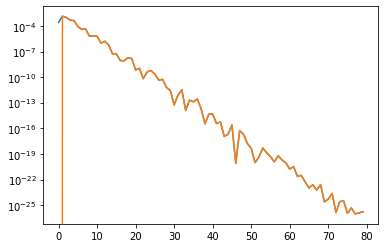

In [46]:
plt.semilogy(Rc.diagonal())
plt.semilogy(Rm.diagonal())

### [b]

In [14]:
A= np.array([[0.7, 0.70711], [0.7, 0.70711]])
Qm, Rm= mgs(A)
V, R= qrhouse(A)
Q= formQ(V)

print(np.linalg.norm(np.dot(np.transpose(Q), Q) - np.eye(2)))
print(np.linalg.norm(np.dot(np.transpose(Qm), Qm) - np.eye(2)))

2.80477417234131e-16
1.400142849854971


householder is more stable

---

## 3.3

In [48]:
def givens_rotation(A):
    (m, n)= A.shape
    Q= np.eye(m)
    R= A
    
    def givens_cs(x, y):
        theta= np.arctan(np.array(y/x))
        c= np.cos(theta)
        s= np.sin(theta)
        return c, s
    
    for j in range(n):
        for i in range(m-1, j, -1):
            G= np.eye(m)
            c, s= givens_cs(R[i-1, j], R[i, j])
            G[i-1, i-1]= c
            G[i-1, i]= s
            G[i, i]= c
            G[i, i-1]= -s
            R= np.dot(G, R)
            Q= np.dot(Q, G)
            
    return Q, R

In [49]:
a= np.random.randn(4, 4)
Q, R= givens_rotation(a)

print(Q)
print(R)

[[ 0.74891033 -0.26709465  0.48904966  0.35864215]
 [ 0.07382013  0.9427277   0.24438744  0.21468548]
 [-0.28395651 -0.10916765 -0.29017051  0.90733246]
 [ 0.59418229  0.16735401 -0.78543382 -0.0450972 ]]
[[ 1.52704879e+00  9.39815932e-01 -3.20842764e-01 -6.99053917e-01]
 [ 4.63953464e-17 -1.87853577e+00 -1.73436372e-01 -6.34252629e-01]
 [ 8.29094054e-17  0.00000000e+00 -4.00971386e-01 -8.18427114e-01]
 [ 1.47608880e-16  0.00000000e+00  2.77555756e-17  8.86478608e-01]]


## 4.3

### (a)

In [50]:
def plot_eigv(m):
    v_list= []
    for i in range(100):
        A= np.random.randn(m,m)/np.sqrt(m)
        v_list.append(np.linalg.eig(A)[0])

    for v_ in v_list:
        plt.scatter(np.real(v_), np.imag(v_))

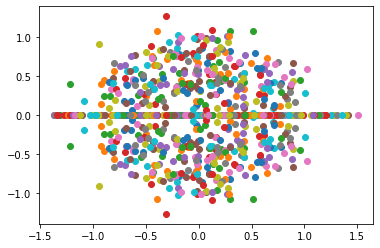

In [51]:
plot_eigv(8)

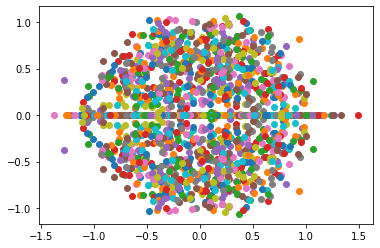

In [52]:
plot_eigv(16)

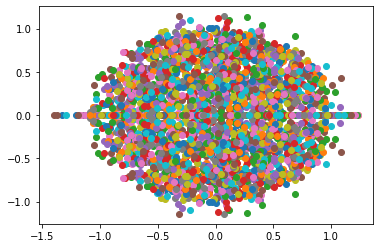

In [53]:
plot_eigv(32)

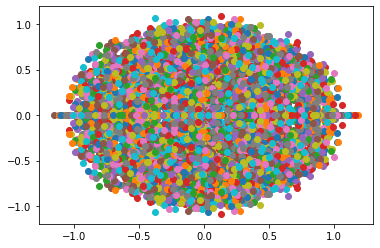

In [54]:
plot_eigv(64)

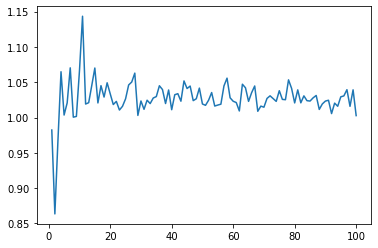

In [55]:
m=10
spec= []
while m <= 1000:
    A= np.random.randn(m, m)/np.sqrt(m)
    v= np.linalg.eig(A)[0]
    spec.append(abs(max(v, key=abs)))
    m+=10
    
x= [k for k in range(1, 101)]
plt.plot(x, spec)

### (b)

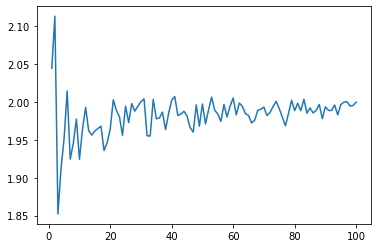

In [56]:
m=10
norms=[]
while m<= 1000:
    A= np.random.randn(m,m)/np.sqrt(m)
    norms.append(np.linalg.norm(A, ord=2))
    m += 10
x= [k for k in range(1, 101)]
plt.plot(x, norms)

### (C)

In [57]:
mins= []
for i in range(100):
    A= np.random.randn(4, 4)/np.sqrt(4)
    sing= np.linalg.norm(A, ord=-2)
    mins.append(sing)

In [59]:
c=0
for i in mins:
    if i <= 0.5:
        c+=1
        
print(c/100)

0.96


In [60]:
c=0
for i in mins:
    if i <= 0.25:
        c+=1
        
print(c/100)

0.72


In [61]:
c=0
for i in mins:
    if i <= 0.125:
        c+=1
        
print(c/100)

0.42


In [62]:
c=0
for i in mins:
    if i <= 0.0625:
        c+=1
        
print(c/100)

0.25
